In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)
print(f"Shape of the daatset:{df.shape}")
print(f"Size of the daatset:{df.size}")
df.head()



Shape of the daatset:(7043, 21)
Size of the daatset:147903


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Seperate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
print(f"Categorical Columns:{cat_cols}")
print(f"Numerical Columns:{num_cols}")

Categorical Columns:Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical Columns:Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


**Missing Value Analysis**

In [4]:
#Checking are there any empty strings in Total Charges
con1= df['TotalCharges'] == " "
print(f"Empty strings in Total Charges column :{len(df[con1])}")
print("\n#############################\n")
print("Befor replacing")
print(df['TotalCharges'].take([488]))

#Replacing empty strings(" ") with 0, ease for datatype conversion
df['TotalCharges']=df['TotalCharges'].replace(" ",'0')
print("\n###############################\n")
print("After replacing")
df.TotalCharges.take([488])

Empty strings in Total Charges column :11

#############################

Befor replacing
488     
Name: TotalCharges, dtype: object

###############################

After replacing


488    0
Name: TotalCharges, dtype: object

**Dropping unnecessary columns,Checking for Duplicates and Changing Column data types**

In [5]:
#We don't need Customer id as it has 7,043 unique values, can't find any patterns from that column
try:
 df=df.drop('customerID',axis=1)
except Exception as e:
    print(e)
    
#Total charges columns is a numerical columns, here it is categorical columns
#Converting Total charges column as a numerical column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df

#Checking Duplicates
print(f"Duplicate rows:{df.duplicated().sum()}")

print("Dropping duplicate rows")
df = df.drop_duplicates(keep='last')

print("After removal of duplicates")
print(f"Duplicate rows:{df.duplicated().sum()}")

Duplicate rows:22
Dropping duplicate rows
After removal of duplicates
Duplicate rows:0


In [6]:
cat_cols= df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
cat_cols,num_cols

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

**Filling the missing values in Total Charges with correct values**

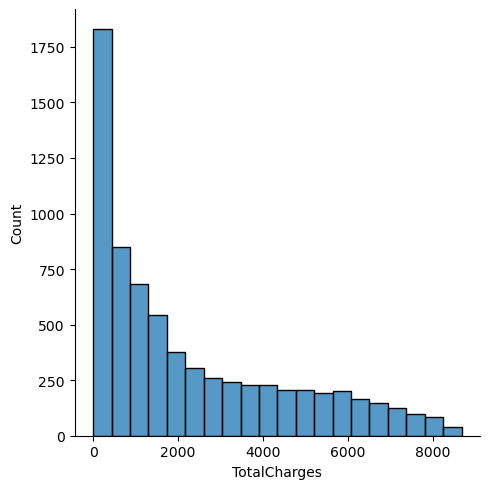

In [7]:
sns.displot(df.TotalCharges,bins=20)
plt.show()

In [8]:
#Data is normally distributed having skewness, so we will fill those empty values with median
median_val = round(np.median(df['TotalCharges']),2)
df.TotalCharges = df['TotalCharges'].replace(0,median_val)                                           

**Categorical Column Analysis**

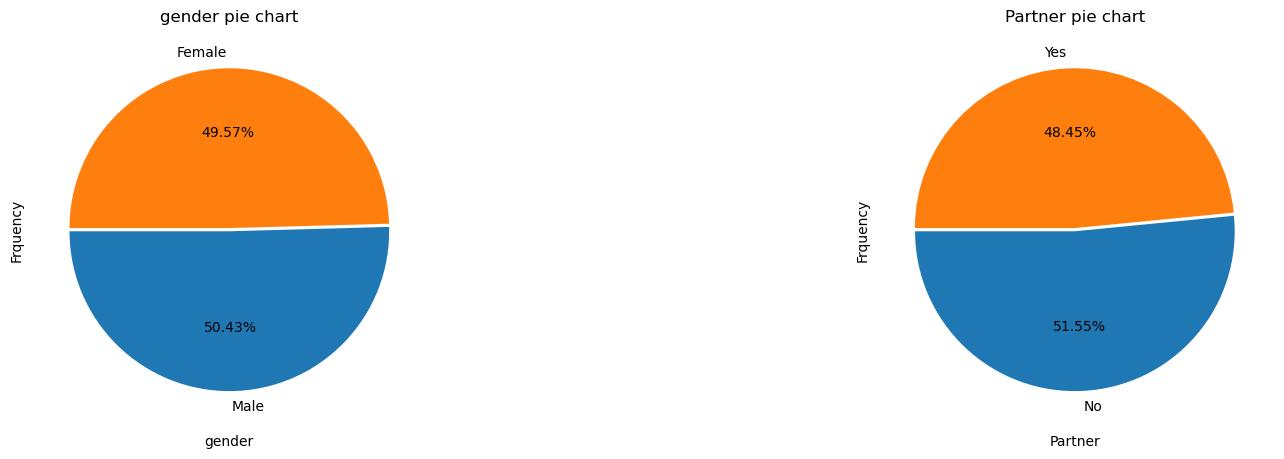

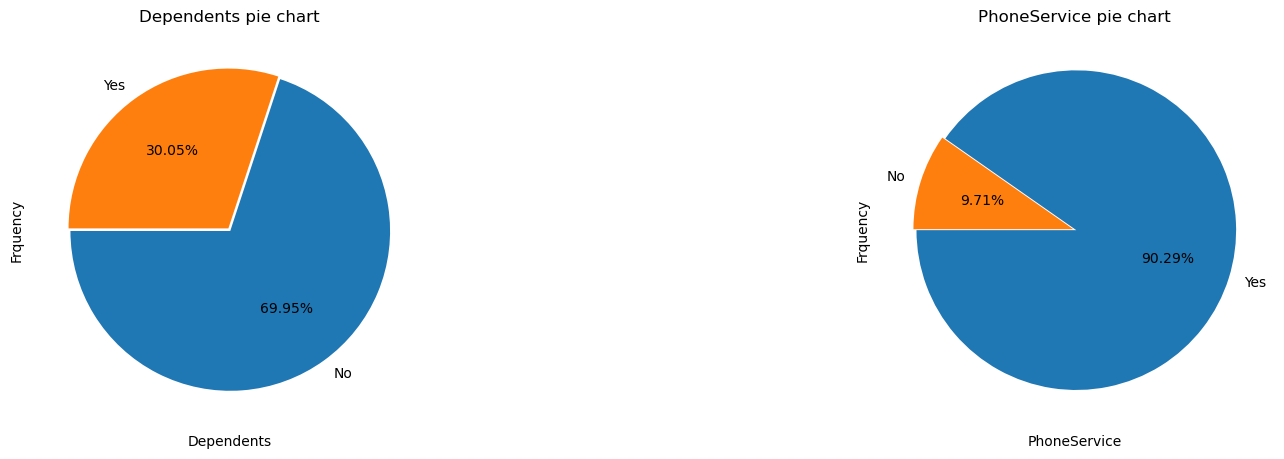

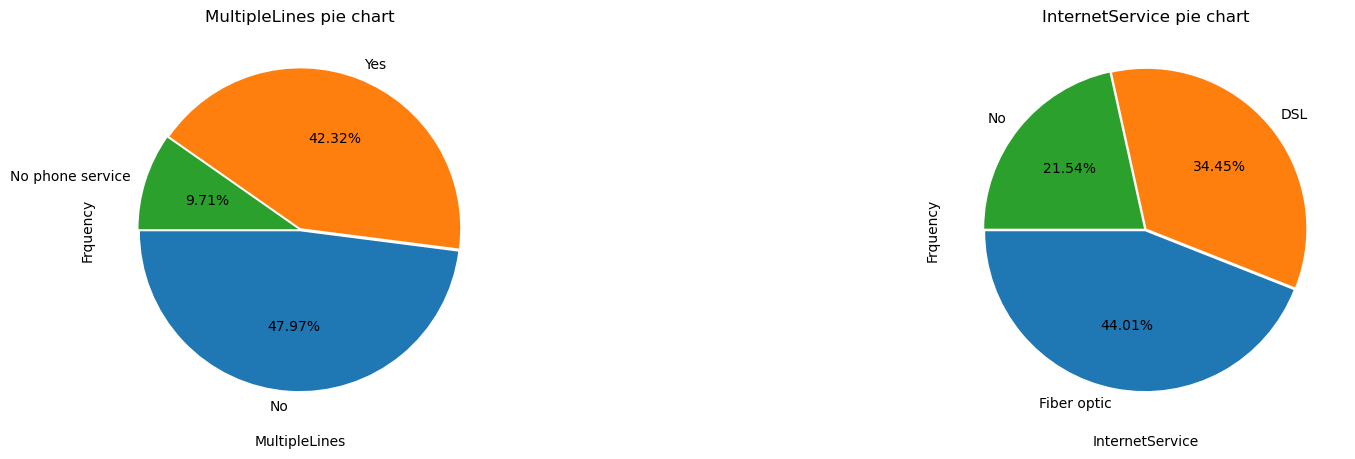

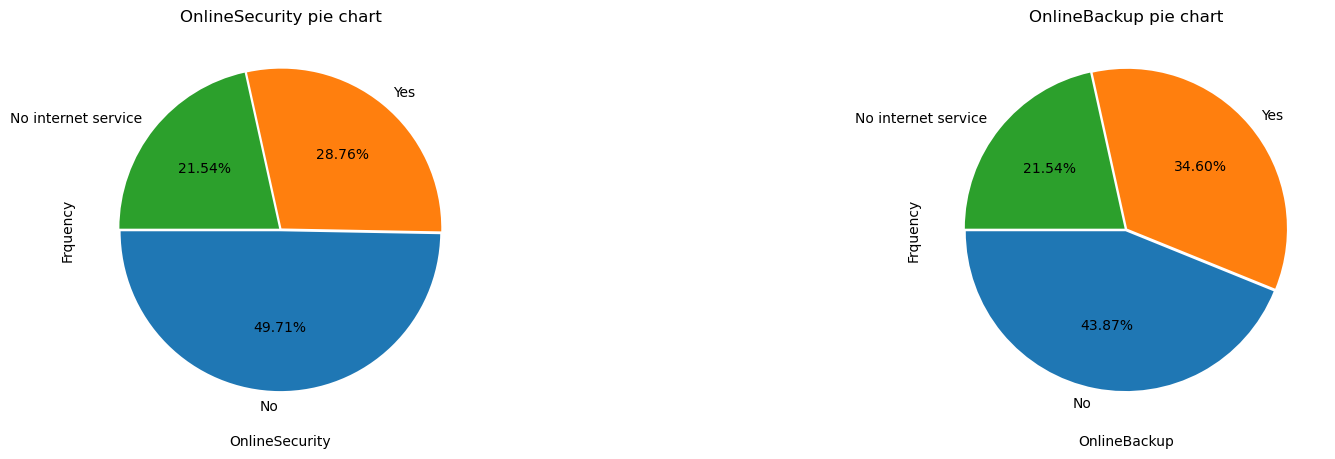

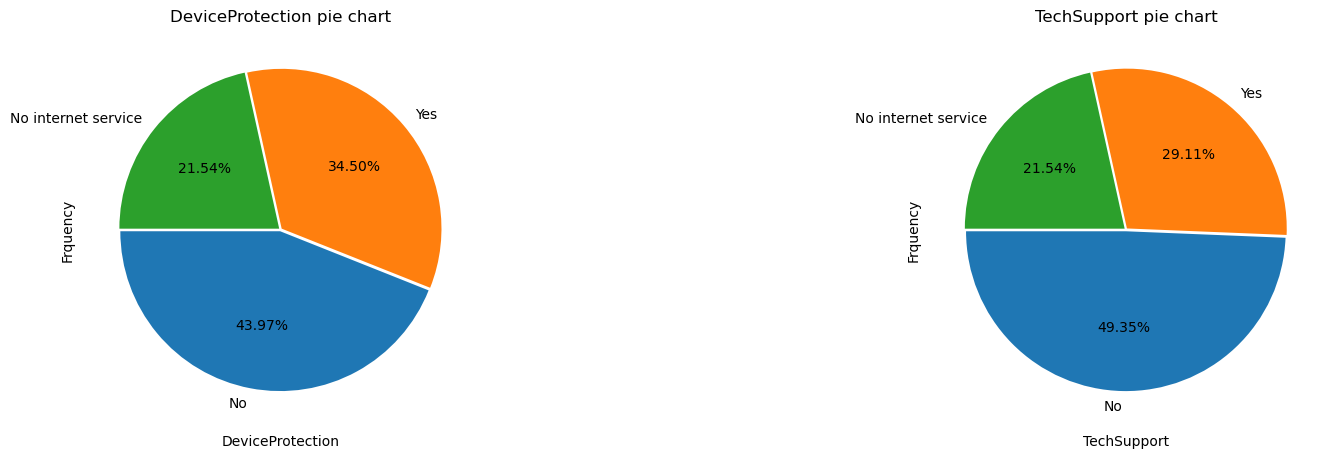

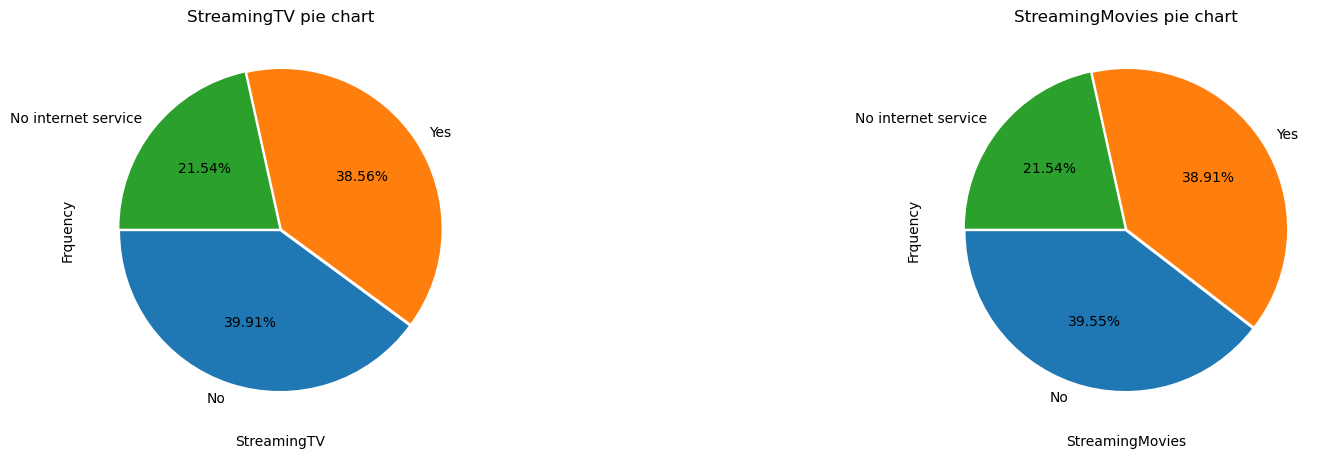

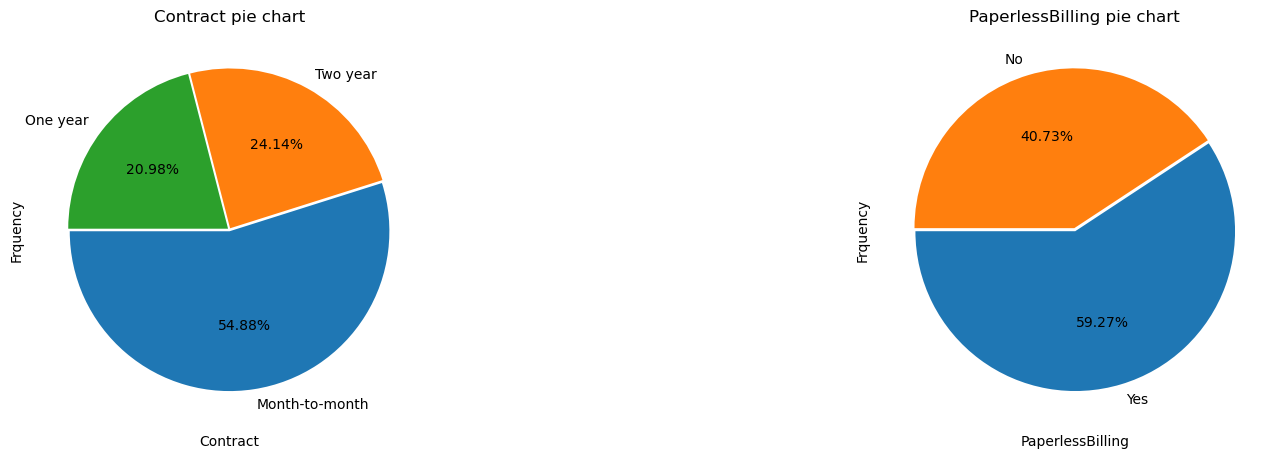

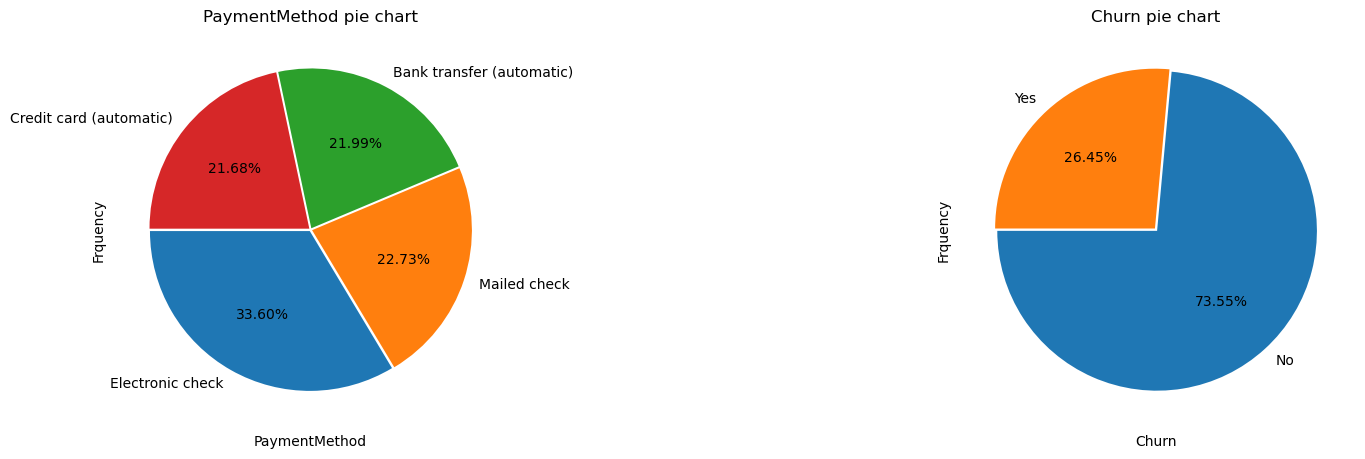

In [23]:
count=0
for i in range(0,8):
    plt.figure(figsize=[20,55])
    for j in range(0,2):
        col = cat_cols[count]
        keys = df[col].value_counts().keys()
        values = df[col].value_counts().values
        plt.subplot(9,2,count+1)
        plt.title(f"{col} pie chart")
        #sns.countplot(data=df,x=col,order=keys)
        plt.pie(values,
                explode=[0.01]*len(keys),
                labels = keys,
                autopct = "%0.2f%%",
                startangle = 180,
                radius =1)
        plt.xlabel(f"{col}")
        plt.ylabel("Frquency")
        count+=1

plt.show()
        

**Bivariate analysis**

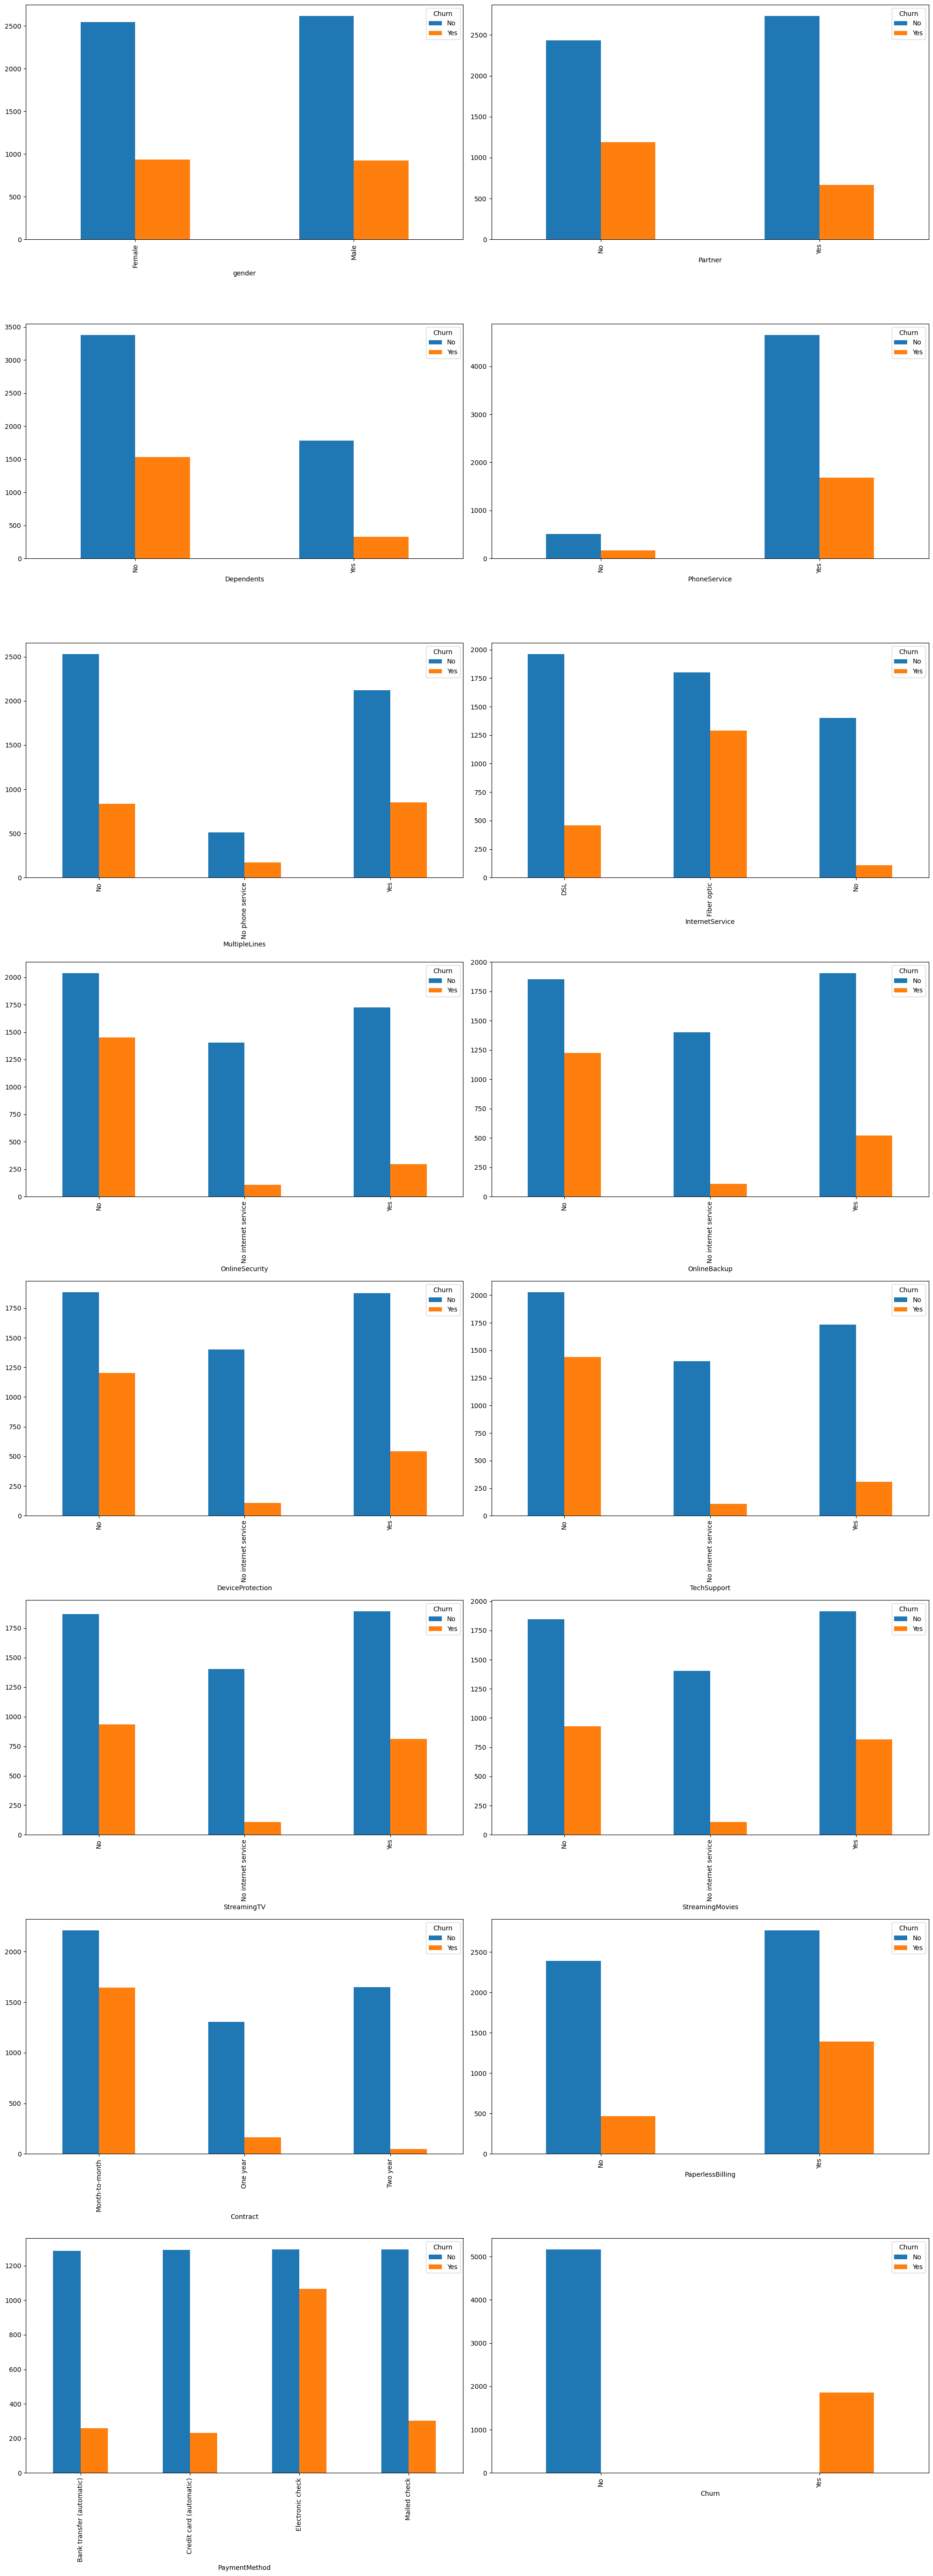

In [25]:
fig,axs = plt.subplots(8,2,figsize=[20,55])

#Iterate over columns and plot
for i, col in enumerate(cat_cols):
    df1=pd.crosstab(df[col],df.Churn)
    row = i//2
    col_idx = i%2
    df1.plot(kind='bar',ax=axs[row,col_idx])
    
#Layout so plots do not overalep
fig.tight_layout()
plt.show()

- Customers with **no dependents** are more likely to churn.

- **Fibre Optic internet service** customers are more prone to churning.
  
- **Month-to-Month contract** customers tend to churn more than those with 1/2 years contract customers.
  
- Customers using **Electronic checks for payments** are more likely to churn

- **Paperless billing** users churns more

**Target Column Analysis**

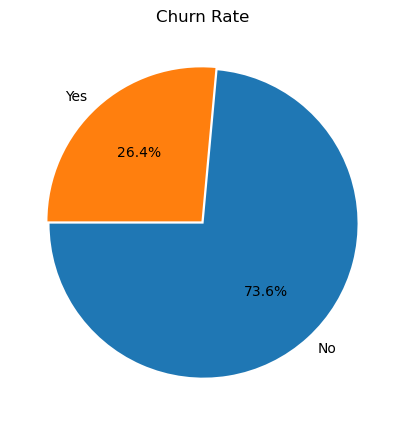

In [35]:
keys = df.Churn.value_counts().keys()
vals = df.Churn.value_counts().values
plt.figure(figsize=[5,5])
plt.title("Churn Rate")
plt.pie(vals,explode = [0.01]*len(keys),
        labels=keys,
        autopct="%0.01f%%",
       startangle=180,
       radius=1)

plt.show()

**Numerical Column Analysis**

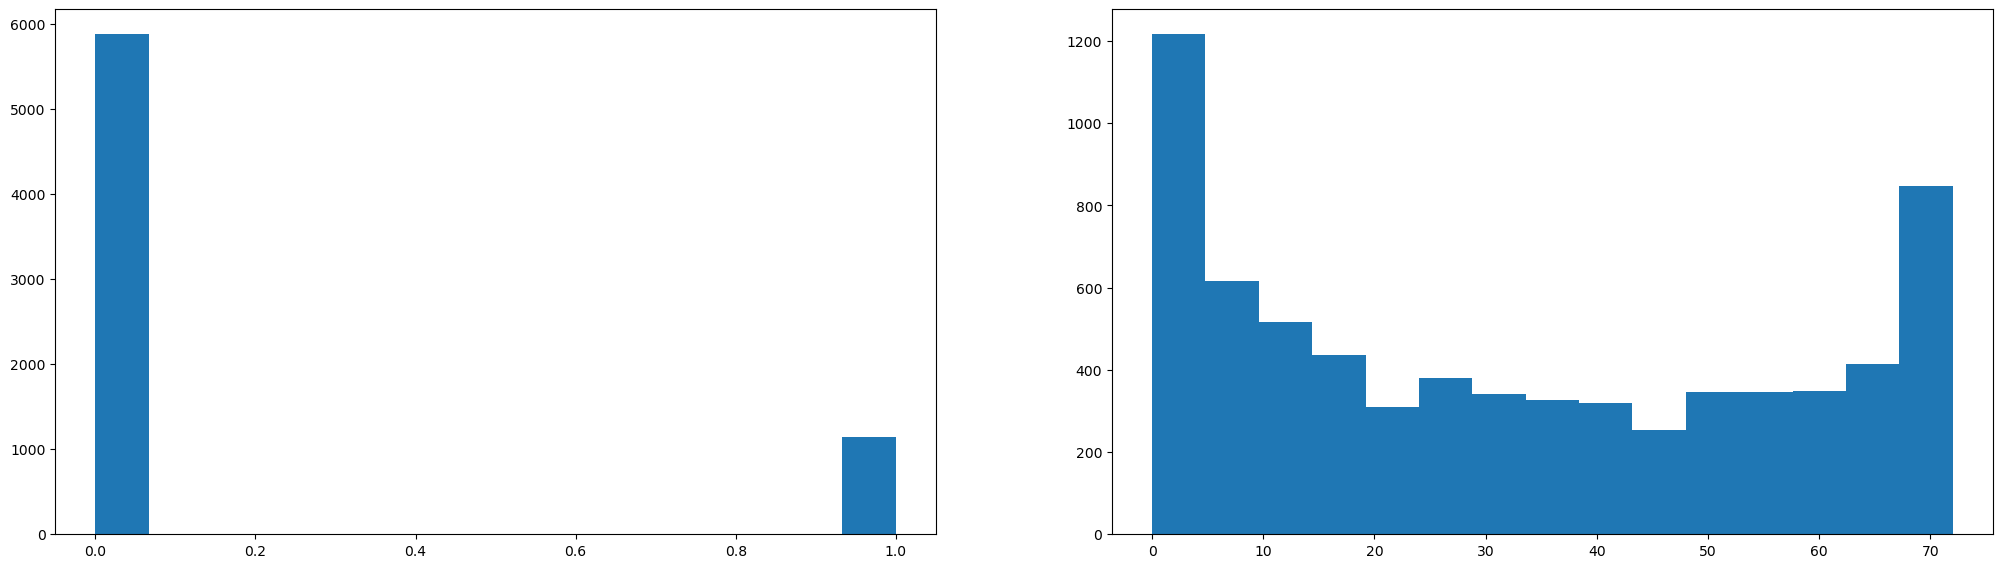

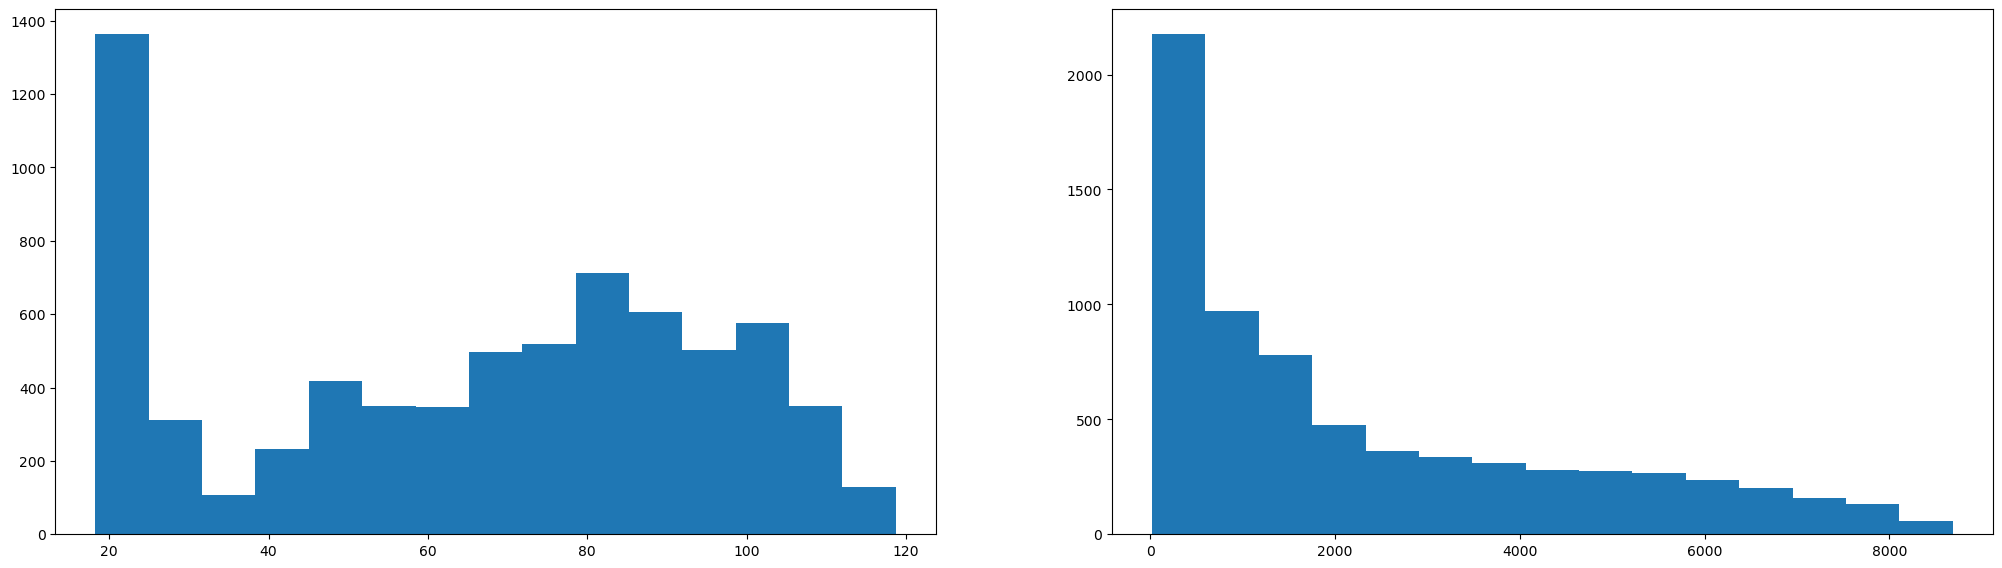

In [36]:
count=0
for i in range(0,2):
    plt.figure(figsize=[25,15])
    for j in range(0,2):
      col = num_cols[count]
      plt.subplot(2,2,count+1)
      plt.hist(df[col],bins=15)
      count+=1
plt.show()

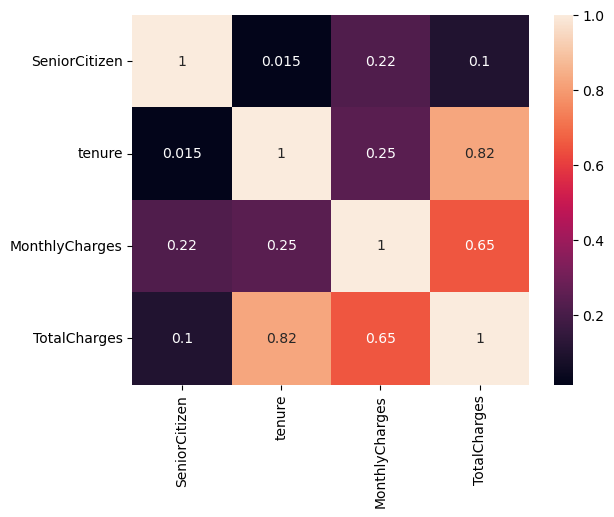

In [37]:
corr_data = df.corr(numeric_only = True)
sns.heatmap(corr_data,annot = True)
plt.show()

In [38]:
df['tenure_group']= pd.cut(df['tenure'],
                           bins=[0,13,25,37,75],
                           labels=['0-12','13-24','25-36','37-72'],
                           right=False)

df['MonthlyCharge_group']=pd.cut(df['MonthlyCharges'],
                                 bins=[0,90,100,110,120],
                                 labels=['0-90','91-100','101-110','110-120'],
                                 right=False)
#df['TotalServices'] = df['PhoneService'] +df['InternetService'] + df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] +df['TechSupport']+ df['StreamingTV'] +df['StreamingMovies']
#df['NewAvgChargesPerService'] = df['MonthlyCharges']/df['TotalServices']

df   

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharge_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,0-90
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,0-90
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,0-90
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-72,0-90
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,0-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24,0-90
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,37-72,101-110
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,0-90
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,0-90


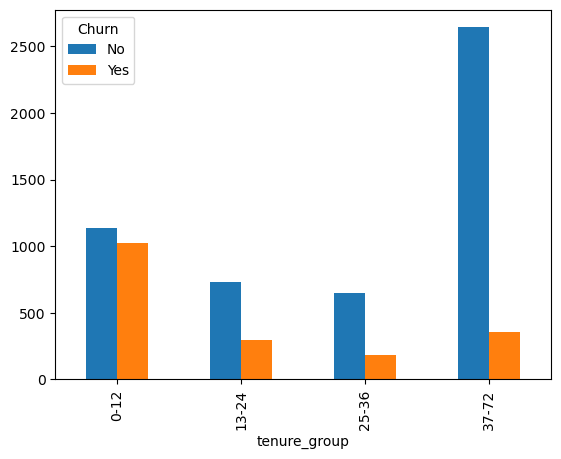

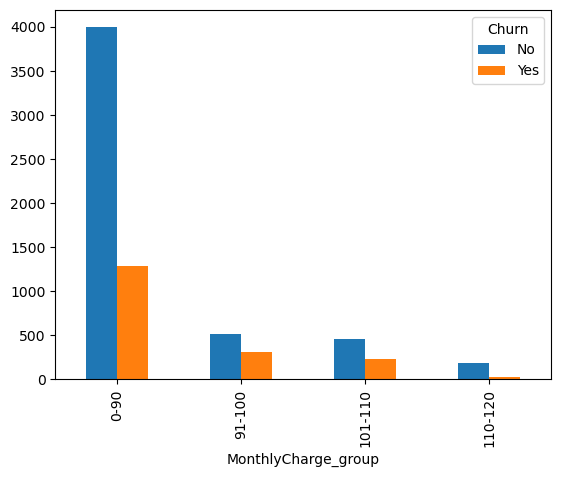

In [40]:
tenure_data=pd.crosstab(df.tenure_group,df.Churn)
tenure_data.plot(kind='bar')

month_data=pd.crosstab(df.MonthlyCharge_group,df.Churn)
month_data.plot(kind='bar')
plt.show()


**LabelEncoding**

In [41]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [42]:
#Using Label Encoder for some columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in ['gender','Partner','Dependents','PhoneService','Contract','PaymentMethod',"InternetService"]:
    df[cols] = le.fit_transform(df[cols])
    

services = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in services:
    df[col] = np.where(df[col]=='Yes',1,0)

tenure_group_map = {'0-12':0,'13-24':1,'25-36':2,'37-72':3}
monthly_group_map =  {'0-90':0,'91-100':1,'101-110':2,'110-120':3}
df['tenure_group'] = df['tenure_group'].map(tenure_group_map )
df['MonthlyCharge_group'] = df['MonthlyCharge_group'].map(monthly_group_map)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharge_group
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,2,29.85,29.85,0,0,0
1,1,0,0,0,34,1,0,0,1,0,...,0,0,1,0,3,56.95,1889.50,0,2,0
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,1,3,53.85,108.15,1,0,0
3,1,0,0,0,45,0,0,0,1,0,...,0,0,1,0,0,42.30,1840.75,0,3,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,...,1,1,1,1,3,84.80,1990.50,0,1,0
7039,0,0,1,1,72,1,1,1,0,1,...,1,1,1,1,1,103.20,7362.90,0,3,2
7040,0,0,1,1,11,0,0,0,1,0,...,0,0,0,1,2,29.60,346.45,0,0,0
7041,1,1,1,0,4,1,1,1,0,0,...,0,0,0,1,3,74.40,306.60,1,0,0


**Feature Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
continous_data =['tenure','MonthlyCharges','TotalCharges']
df[continous_data]= scaler.fit_transform(df[continous_data])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharge_group
0,0,0,1,0,-1.282728,0,0,0,0,1,...,0,0,0,1,2,-1.164135,-0.997330,0,0,0
1,1,0,0,0,0.062387,1,0,0,1,0,...,0,0,1,0,3,-0.262811,-0.176350,0,2,0
2,1,0,0,0,-1.241967,1,0,0,1,1,...,0,0,0,1,3,-0.365914,-0.962763,1,0,0
3,1,0,0,0,0.510759,0,0,0,1,0,...,0,0,1,0,0,-0.750058,-0.197871,0,3,0
4,0,0,0,0,-1.241967,1,0,1,0,0,...,0,0,0,1,2,0.194503,-0.943559,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.345224,1,1,0,1,0,...,1,1,1,1,3,0.663458,-0.131761,0,1,0
7039,0,0,1,1,1.611307,1,1,1,0,1,...,1,1,1,1,1,1.275428,2.239996,0,3,2
7040,0,0,1,1,-0.875118,0,0,0,1,0,...,0,0,0,1,2,-1.172450,-0.857561,0,0,0
7041,1,1,1,0,-1.160445,1,1,1,0,0,...,0,0,0,1,3,0.317562,-0.875153,1,0,0


**feature Selection**

In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

X=df.drop('Churn',axis=1)
y=df['Churn']

mutual_info = mutual_info_classif(X,y)
mutual_info_df = pd.DataFrame(mutual_info,
                              columns=['Information gain'],
                             index=X.columns)
sorted_mutual_info_df = mutual_info_df.sort_values(by='Information gain', ascending =False)
sorted_mutual_info_df.head(10)

#train rf model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
imp_features = rf.feature_importances_
features_df = pd.DataFrame(zip(X.columns,imp_features),columns=['Columns','Importance'])
features_sort = features_df.sort_values(by='Importance',ascending=False)
sorted_mutual_info_df.head(12), features_sort.head(12)

(                 Information gain
 Contract                 0.105129
 tenure                   0.078829
 tenure_group             0.062095
 InternetService          0.055437
 PaymentMethod            0.050345
 MonthlyCharges           0.045716
 TotalCharges             0.042666
 TechSupport              0.026216
 Partner                  0.016114
 SeniorCitizen            0.014889
 OnlineSecurity           0.013801
 StreamingMovies          0.011179,
              Columns  Importance
 17    MonthlyCharges    0.189810
 18      TotalCharges    0.179495
 4             tenure    0.148038
 14          Contract    0.075810
 16     PaymentMethod    0.052514
 19      tenure_group    0.040231
 7    InternetService    0.038440
 0             gender    0.027901
 15  PaperlessBilling    0.027078
 2            Partner    0.022163
 8     OnlineSecurity    0.021697
 11       TechSupport    0.021443)

In [45]:
#Selecting Top 10 fetures 
import warnings
warnings.filterwarnings('ignore')

new_df = df[sorted_mutual_info_df.index[:12]]
rf_imp_cols=['gender','Partner','SeniorCitizen','Dependents','PhoneService']
new_df[rf_imp_cols]=df[rf_imp_cols]
new_df


,Contract,tenure,tenure_group,InternetService,PaymentMethod,MonthlyCharges,TotalCharges,TechSupport,Partner,SeniorCitizen,OnlineSecurity,StreamingMovies,gender,Dependents,PhoneService
0,0,-1.282728,0,0,2,-1.164135,-0.997330,0,1,0,0,0,0,0,0
1,1,0.062387,2,0,3,-0.262811,-0.176350,0,0,0,1,0,1,0,1
2,0,-1.241967,0,0,3,-0.365914,-0.962763,0,0,0,1,0,1,0,1
3,1,0.510759,3,0,0,-0.750058,-0.197871,1,0,0,1,0,1,0,0
4,0,-1.241967,0,1,2,0.194503,-0.943559,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.345224,1,0,3,0.663458,-0.131761,1,1,0,1,1,1,1,1
7039,1,1.611307,3,1,1,1.275428,2.239996,0,1,0,0,1,0,1,1
7040,0,-0.875118,0,0,2,-1.172450,-0.857561,0,1,0,1,0,0,1,0
7041,0,-1.160445,0,1,3,0.317562,-0.875153,0,1,1,0,0,1,0,1


In [46]:
X=new_df
X.shape,y.shape

((7021, 15), (7021,))

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=132)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5616, 15), (1405, 15), (5616,), (1405,))

In [48]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

#Define the models
models = {
    'rf':RandomForestClassifier(),
    'gbc':GradientBoostingClassifier(),
    'abc':AdaBoostClassifier()}
rf=RandomForestClassifier()   
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(f"Acc:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))
print("\n########################\n")

print("GradientBoosting Algorithm")
gbc=GradientBoostingClassifier()  
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print(f"Acc:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))
print("\n########################\n")
print("AdaBoostClassifier")
ad= AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)

print(f"Acc:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))
print("\n########################\n")
print("XGBClassifier")
xgb= XGBClassifier(objective = 'binary:logistic',enable_categorical=True)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

print(f"Acc:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Acc:0.7829181494661922
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1005
           1       0.67      0.48      0.56       400

    accuracy                           0.78      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.77      0.78      0.77      1405


########################

GradientBoosting Algorithm
Acc:0.7857651245551601
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1005
           1       0.67      0.49      0.57       400

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.77      0.79      0.78      1405


########################

AdaBoostClassifier
Acc:0.7857651245551601
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1005
           1       0.66      0.51      0.57       400

    accuracy 

**Hyperparameter Tuning**

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

#Hyperparameter grid
param_grid = {
    'n_estimators':[50,100,150,200],
    'learning_rate':[0.1,0.5,1,1.5],
    'algorithm':['SAMME','SAMME.R']
}

#Defining score metric
scorer = make_scorer(f1_score,pos_label=1)

#Perform grid search
grid_search = GridSearchCV(AdaBoostClassifier(),param_grid, cv=5,scoring = scorer)
grid_search.fit(X_train,y_train)

#Prnt the best hyperparameters and score
print("Best parameters:",grid_search.best_params_)
print("Best score:",grid_search.best_score_)

#Train a new model  with best hyperparmeter tuning
best_model= AdaBoostClassifier(**grid_search.best_params_)
best_model.fit(X_train,y_train)

Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}
Best score: 0.5721824051990266


AdaBoostClassifier(learning_rate=1)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
print(f"Acc:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Acc:0.7857651245551601
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1005
           1       0.66      0.51      0.57       400

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.72      1405
weighted avg       0.78      0.79      0.78      1405



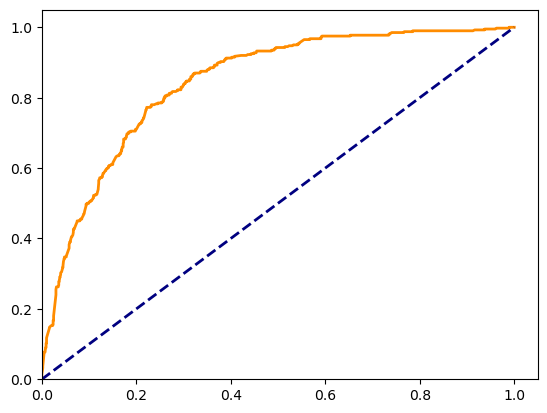

In [55]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = best_model.predict_proba(X_test)[:,1]
#Calculate ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

auc_val =auc(fpr,tpr)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle = '--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.show()

**Save the model**

In [76]:
import pickle
with open('adaboost_model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [37]:
import joblib
joblib.dump(best_model,'ada_model.joblib')

['ada_model.joblib']

In [38]:
joblib.dump(scaler,'scaler.joblib')
joblib.dump(le,'encoder.joblib')

['encoder.joblib']